Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [183]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [184]:
titanic_df = pd.read_csv('./train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

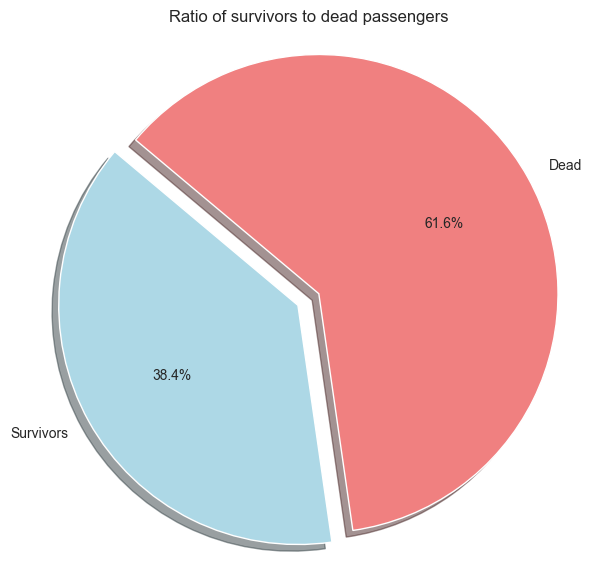

In [186]:
survival_counts = titanic_df['Survived'].value_counts()

labels = 'Survivors', 'Dead'
sizes = [survival_counts[1], survival_counts[0]] 
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Ratio of survivors to dead passengers')
plt.axis('equal')  
plt.show()

Отримана візуалізація pie chart відображає співвідношення виживших і загиблих пасажирів Титаніку. Згідно з даними, представленими на графіку, 38,4% пасажирів вижили, тоді як 61,6% пасажирів загинули внаслідок катастрофи. Pie chart яскраво демонструє це співвідношення, дозволяючи швидко оцінити масштаби трагедії. Використання кольорів (синій для виживших і червоний для загиблих) додає візуальної чіткості.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


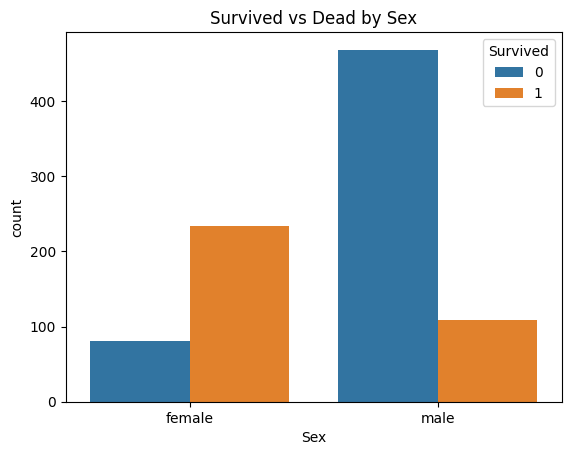

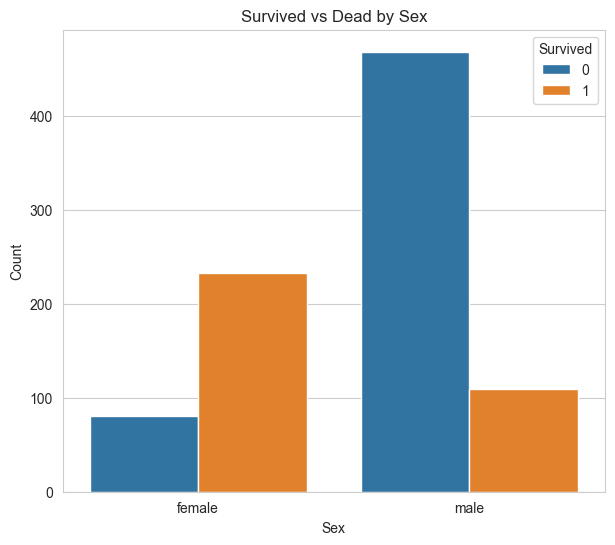

In [187]:
grouped_data = titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()

plt.figure(figsize=(7, 6))
sns.barplot(x='Sex', y='size', hue='Survived', data=grouped_data)

plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')

plt.show()

Спостерігається значна різниця у виживаності між чоловіками та жінками. Це може бути повʼязано в звяʼзку з тим, що чоловіки в першу чергу допомагали жінкам та дітям.
Кількість виживших жінок більша, ніж кількість загиблих жінок, що можна побачити за висотою синього стовпця порівняно з темно-помаранчевим для жіночої категорії.

В свою чергу, виживших чоловіків набагато менше за померлих, можливо, по тій самій причині.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

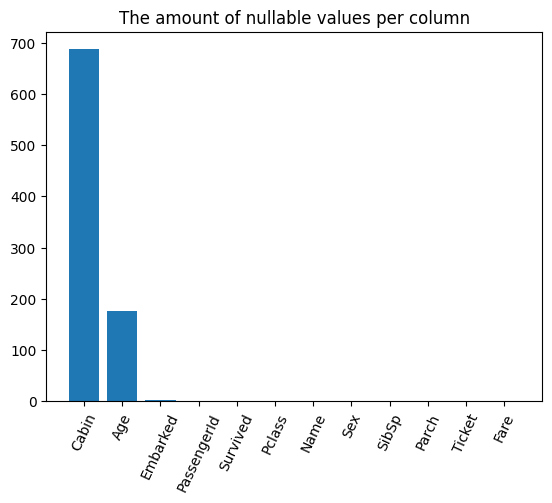

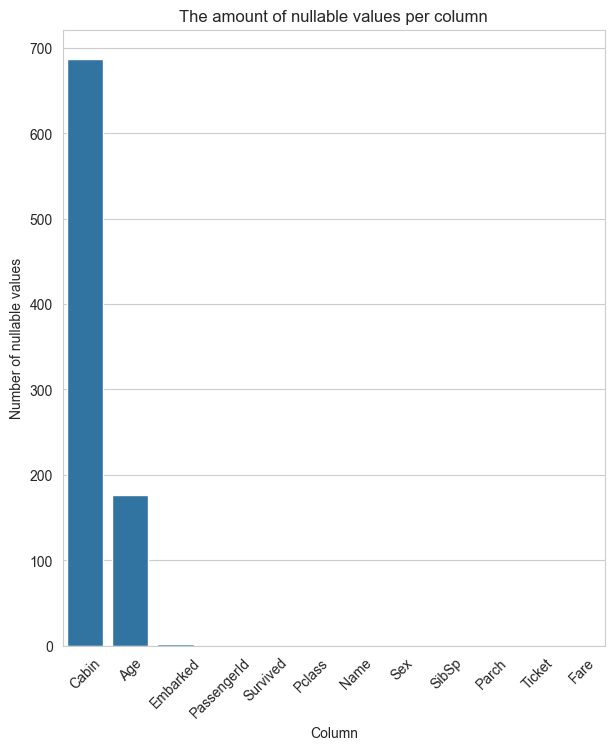

In [188]:
missing_values = titanic_df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(7, 8))
sns.barplot(x=missing_values.index, y=missing_values.values)

plt.title('The amount of nullable values per column')
plt.xlabel('Column')
plt.ylabel('Number of nullable values')
plt.xticks(rotation=45)  

plt.show()

На створеному графіку ми бачимо розподіл кількості пропущених значень по колонках у наборі даних Titanic. Зокрема, колонка Cabin має найбільшу кількість пропущених значень, що може вказувати на неповноту даних або на те, що ця інформація не була зафіксована для багатьох пасажирів. Також існує певна кількість пропущених значень у колонці Age, що може ускладнити аналіз, пов'язаний із віком пасажирів. Колонка Embarked має відносно менше пропущених значень, що вказує на більшу повноту цих даних.

Кабіна (Cabin): Ця колонка має найбільшу кількість пропущених значень, що може свідчити про велику кількість даних, які не були зареєстровані або втрачені. Це може ускладнити аналіз виживання на основі розміщення в каютах, оскільки велика частина інформації відсутня.

Вік (Age): Значна кількість пропущених значень у колонці віку також може вплинути на аналіз, зокрема на дослідження, які спробують з'ясувати, чи мала вікова категорія пасажирів вплив на шанси виживання.

Посадка (Embarked): Невелика кількість пропущених значень вказує на те, що майже всі пасажири мають зареєстровані дані про порт посадки. Пропущені дані в цій колонці, ймовірно, легко відновити або проігнорувати без значної шкоди для більшості видів аналізу.



5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

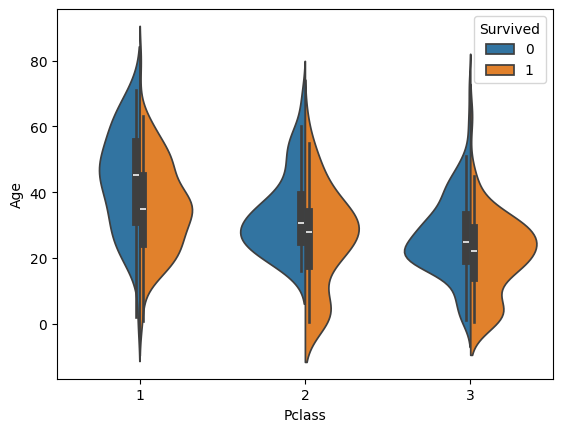

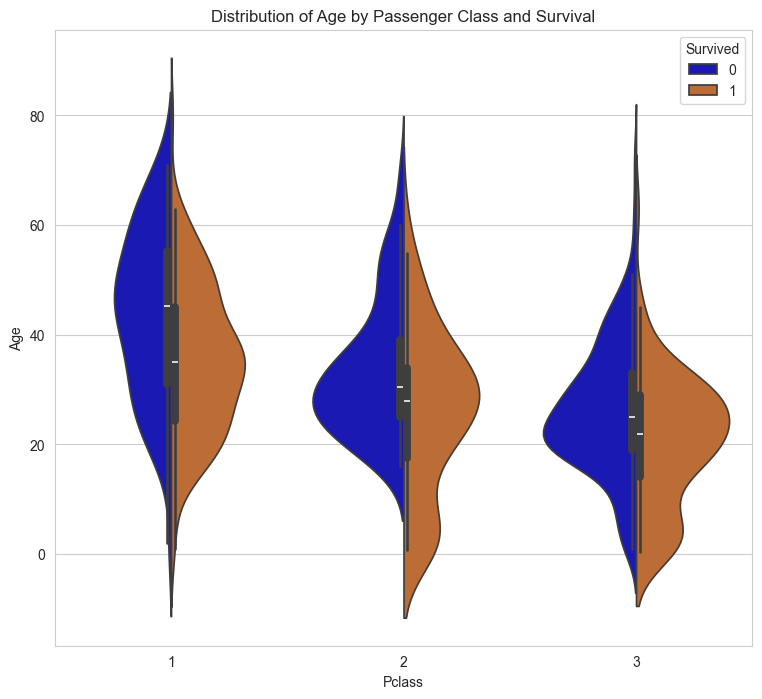

In [189]:
titanic_df_age_cleaned = titanic_df.dropna(subset=['Age'])
palette = {0: "mediumblue", 1: "chocolate"}

plt.figure(figsize=(9, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df_age_cleaned, split=True, palette=palette)

plt.title('Distribution of Age by Passenger Class and Survival')

plt.show()

На графіку відображено розподіл віку пасажирів в залежності від класу каюти (Pclass), який представлений на осі x, та виживання (Survived), де виживання позначено оранжевим кольором (1), а невиживання — синім (0). Графік поділено на дві половини для кожного класу, що дозволяє порівняти розподіл віку між вижившими та невижившими.

У першому класі більший розкид віку серед виживших, що може вказувати на вищі шанси виживання для пасажирів усіх вікових груп цього класу.
У другому класі вікові групи менш різноманітні, але виживаність серед молодших пасажирів вища.
Третій клас має велику кількість молодих пасажирів, що не вижили (синя частина більша та ширша на нижньому кінці вікового розподілу).

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


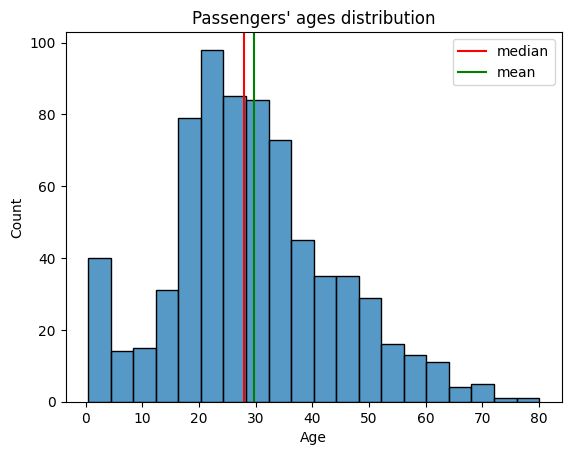

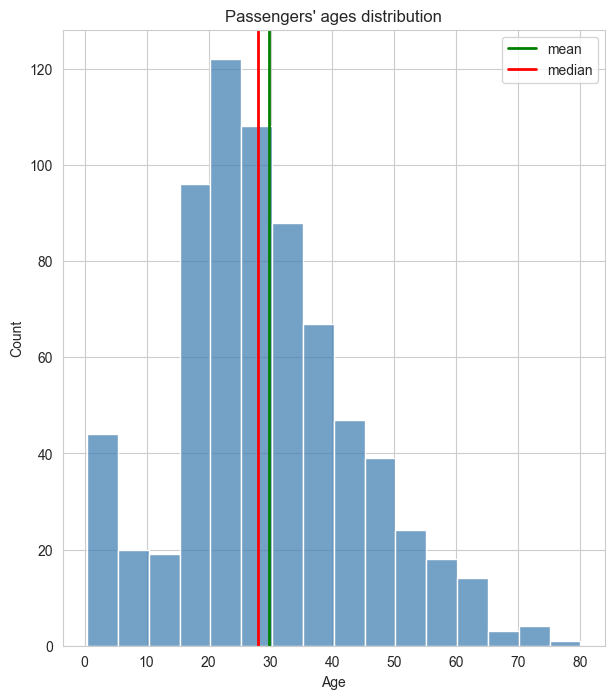

In [190]:
plt.figure(figsize=(7, 8))
sns.histplot(titanic_df_age_cleaned['Age'], bins=16, kde=False, color='steelblue')

mean_age = titanic_df_age_cleaned['Age'].mean()
median_age = titanic_df_age_cleaned['Age'].median()

plt.axvline(mean_age, 0, 1, color='green', label='mean', linewidth=2)
plt.axvline(median_age, 0, 1, color='red', label='median', linewidth=2)

plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

На гістограмі відображено розподіл віку пасажирів Титаніка. Сині стовпці показують кількість пасажирів у кожній віковій групі. Червона лінія представляє медіану віку, а зелена — середній вік пасажирів. За даним графіком, більшість пасажирів були у віці від 20 до 30 років. Середній вік трохи вищий за медіану, що може вказувати на невелике відхилення в бік старших вікових груп

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Який вплив вартості квитка пасажирів на шанси виживання?

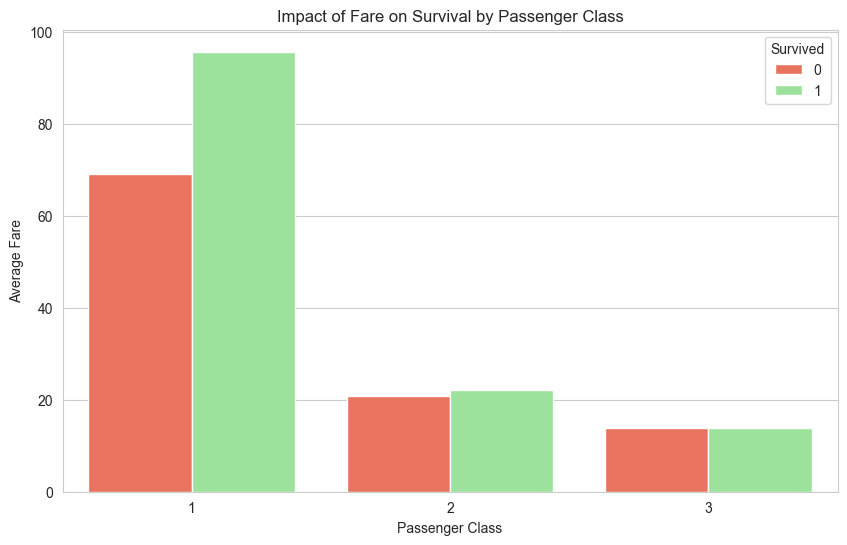

In [191]:
titanic_df_fare_cleaned = titanic_df[titanic_df['Fare'] > 0]

plt.figure(figsize=(10, 6))

fare_survival_by_class = titanic_df_fare_cleaned.groupby(['Pclass', 'Survived'])['Fare'].mean().reset_index()

sns.barplot(x='Pclass', y='Fare', hue='Survived', data=fare_survival_by_class, palette=['#FF6347', '#90EE90'])

plt.title('Impact of Fare on Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.legend(title='Survived')

plt.show()

На цьому графіку представлено вплив вартості квитка на виживання пасажирів за класом кают. Кожний стовпчик представляє середню вартість квитка для виживших та невиживших пасажирів у кожному класі кают. Колірні коди показують статус виживання: червоний відповідає невижившим, а зелений - вижившим. За цим графіком можна зрозуміти, що середня вартість квитків для виживших пасажирів у кожному класі кают була вища, ніж для невиживших. Можливо, пасажири, що заплатили більше за квиток були вище поверхами, тому вибратись було легше.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

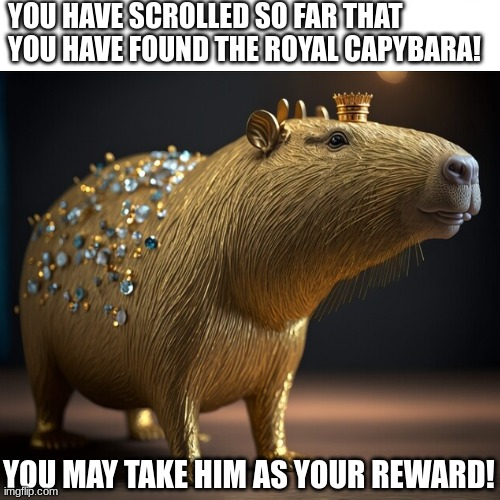